In [93]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC

In [8]:
df_company_data = pd.read_csv('data.csv')
df_company_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [17]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
oversample = SMOTE()



def getBest_Feature(model, name):
    cur_score = 0
    best_score = 0
    best_k = 0
    besgt_feature = 0
    best_predict = 0
    all_k=[]
    all_score=[]
    all_precision=[]
    all_f1=[]
    for k in range(5, X.shape[1], 5):
        y_raw = df_company_data['Bankrupt?']
        x_raw = df_company_data.drop(['Bankrupt?'], axis = 1)

        oversample = RandomOverSampler()
        x_oversampled, y_oversampled = oversample.fit_resample(x_raw, y_raw)


        feature_selection=SelectKBest(f_classif,k=k).fit(x_oversampled,y_oversampled)
        selected_features=X.columns[feature_selection.get_support()]

        y_selected = y_oversampled
        x_selected = x_oversampled.loc[:, selected_features]
        if 'Bankrupt?' in x_selected.columns:
            x_selected = x_selected.drop('Bankrupt?', axis=1)
        
        if x_selected.shape[1] != k:
            print("its wrong")
            break
            
        scaler=StandardScaler()
        X_scale=scaler.fit_transform(x_selected)
        X_train, X_test, y_train, y_test = train_test_split(X_scale, y_selected, test_size=0.3)
        model.fit(X_train, y_train)
        y_pred = 0
        if name == "svc":
            y_pred = model.predict(z)
        else:
            y_pred_proba = model.predict_proba(X_test)
            y_pred = (y_pred_proba[:, 1] >= 0.3).astype(int)
        #y_pred=model.predict(X_test)
        cur_score = recall_score(y_test, y_pred, average='micro')
        all_k.append(k)
        all_score.append(cur_score)
        if cur_score > best_score:
            best_score = cur_score
            best_k = k
            besgt_feature = selected_features  
            best_model = model
    plt.title(name)
    plt.plot(all_k,all_score)
    #for i in range(len(all_k)):
    #    plt.text(all_k[i], all_score[i], f'({all_k[i]:.2f}, {all_score[i]:.2f})')
    plt.savefig(name+".jpeg")
    plt.show()


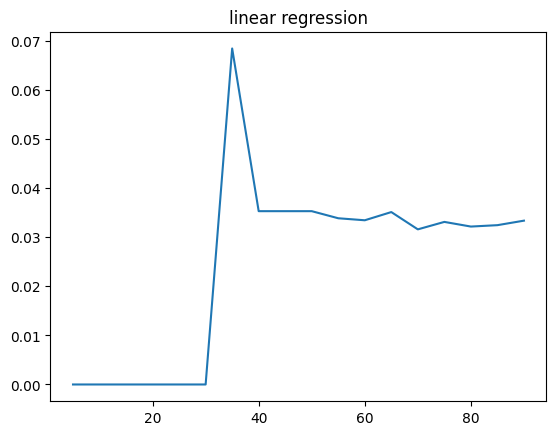

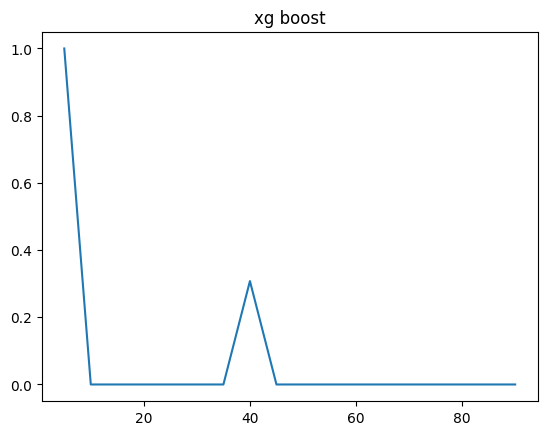

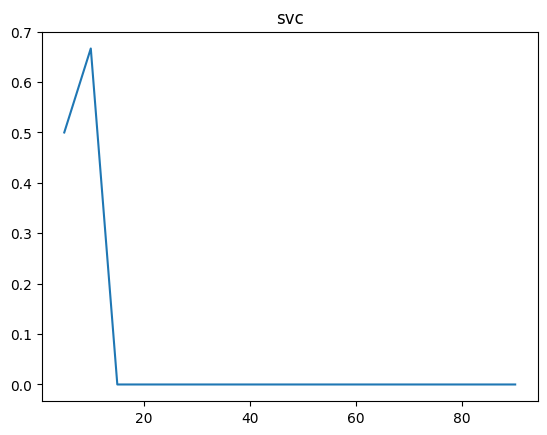

In [18]:
getBest_Feature(LogisticRegression(), "linear regression")
getBest_Feature(XGBClassifier(), "xg boost")
getBest_Feature(SVC(), "svc")

In [94]:
def plotConfusion(k, y_true, y_pred):
    if type(y_true) == int or type(y_pred) == int:
        return
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot confusion matrix
    sns.heatmap(cm_norm, annot=True, cmap='Blues')
    plt.xlabel('Predicted labels at k=' + str(k))
    plt.ylabel('True labels')
    plt.show()


In [97]:
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
oversample = SMOTE()



def getBest_Feature_stratified(model, name):
    cur_score = 0
    best_score = 0
    best_k = 0
    besgt_feature = 0
    best_predict = 0
    best_true = 0
    best_recall = 0
    best_precision = 0
    best_f1 = 0
    best_aoc = 0
    best_accuracy = 0
    
    all_k=[]
    all_score=[]
    all_precision=[]
    all_recall=[]
    all_f1=[]
    all_roc=[]
    all_accuracy=[]
    for k in range(5, 95, 5):
        
        ## Get raw data
        y_raw = df_company_data['Bankrupt?']
        x_raw = df_company_data.drop(['Bankrupt?'], axis = 1)
        
        ##do feature selection
        feature_selection=SelectKBest(f_classif,k=k).fit(x_raw,y_raw)
        selected_features=x_raw.columns[feature_selection.get_support()]
        
        ##select the feature
        y_selected = y_raw
        x_selected = x_raw.loc[:, selected_features]
        if 'Bankrupt?' in x_selected.columns:
            x_selected = x_selected.drop('Bankrupt?', axis=1)
        
        if x_selected.shape[1] != k:
            print("its wrong")
            break
            
            
        scaler=StandardScaler()
        X_scale=scaler.fit_transform(x_selected)
        
        X_train, X_test, y_train, y_test = train_test_split(X_scale, y_raw, test_size=0.2, stratify=y_raw, random_state=42)

        oversample = RandomOverSampler()
        x_oversampled, y_oversampled = oversample.fit_resample(X_train, y_train)
            
        model.fit(x_oversampled, y_oversampled)
        y_pred = 0
        if name == "svc" or name == "ada_boost":
            y_pred = model.predict(X_test)
        else:
            y_pred_proba = model.predict_proba(X_test)
            y_pred = (y_pred_proba[:, 1] >= 0.5).astype(int)
        
        cur_score = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        roc = roc_auc_score(y_test, y_pred, average='macro')
        accuracy =  accuracy_score(y_test, y_pred)
        
        all_k.append(k)
        all_recall.append(cur_score)
        all_precision.append(precision)
        all_f1.append(f1)
        all_accuracy.append(accuracy)
        
        if cur_score > best_score:
            best_score = cur_score
            best_k = k
            besgt_feature = selected_features  
            best_model = model
            best_predict = y_pred
            best_true = y_test
            best_recall = cur_score
            best_precision = precision
            best_f1 = f1
            best_aoc = roc
            best_accuracy = accuracy 
            
    plotConfusion(best_k, best_true, best_predict)
    plt.title(name)
    plt.plot(all_k,all_recall, label="recall")
    plt.plot(all_k,all_f1, label="f1")
    plt.plot(all_k,all_precision, label="precision")
    #plt.plot(all_k,all_roc, label="roc")
    plt.legend()
    plt.savefig(name+".jpeg")
    plt.show()
    print("best k = ", best_k)
    print("best recall = ", best_recall)
    print("best precision = ", best_precision)
    print("best f1 = ", best_f1)
    print("best aoc = ", best_aoc)
    print("best best_accuracy = ", best_accuracy)

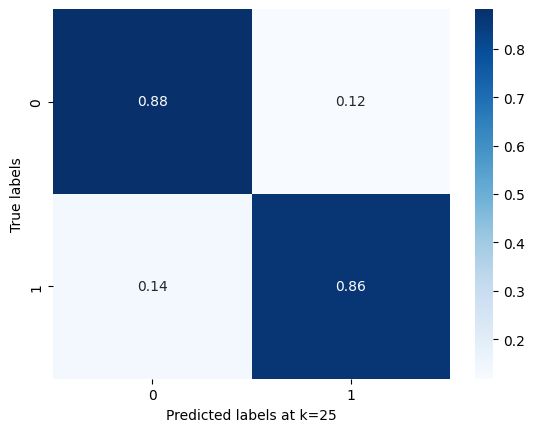

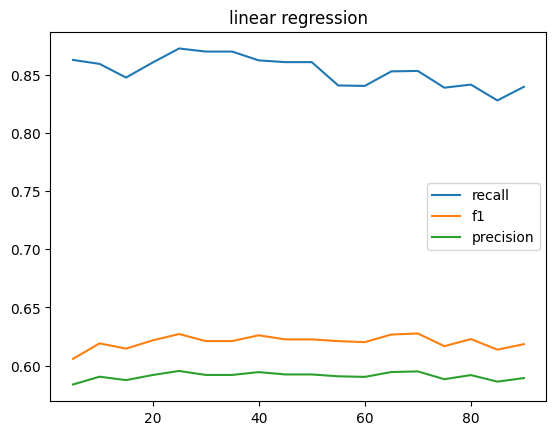

best k =  25
best recall =  0.8727272727272728
best precision =  0.5953740417657943
best f1 =  0.6271337450642908
best aoc =  0.8727272727272728
best best_accuracy =  0.8812316715542522


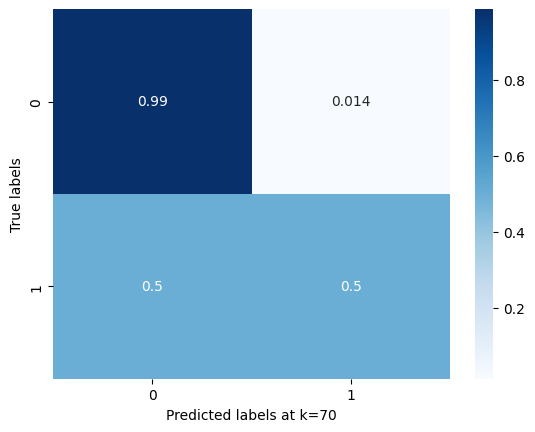

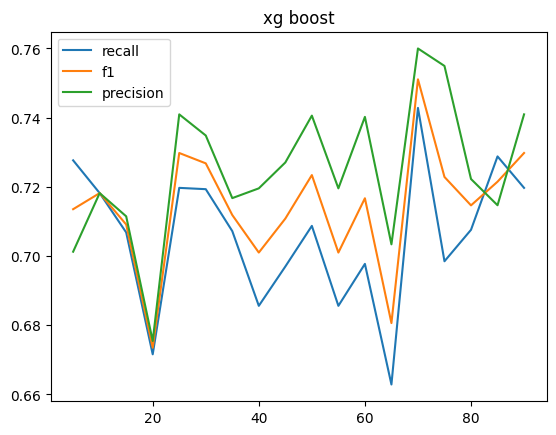

best k =  70
best recall =  0.7428030303030303
best precision =  0.7599782460409639
best f1 =  0.7510671919164942
best aoc =  0.7428030303030303
best best_accuracy =  0.9699413489736071


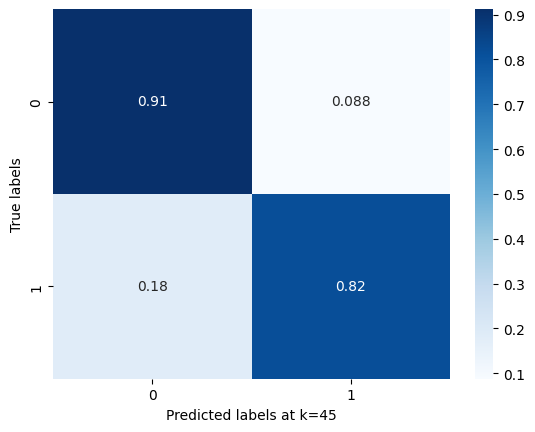

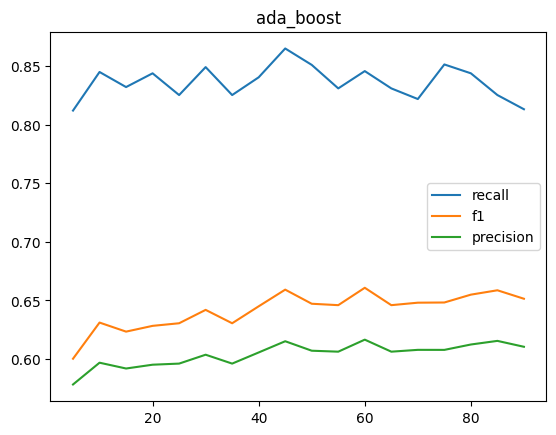

best k =  45
best recall =  0.8651515151515152
best precision =  0.6151207225985756
best f1 =  0.6591868975078183
best aoc =  0.8651515151515152
best best_accuracy =  0.9090909090909091


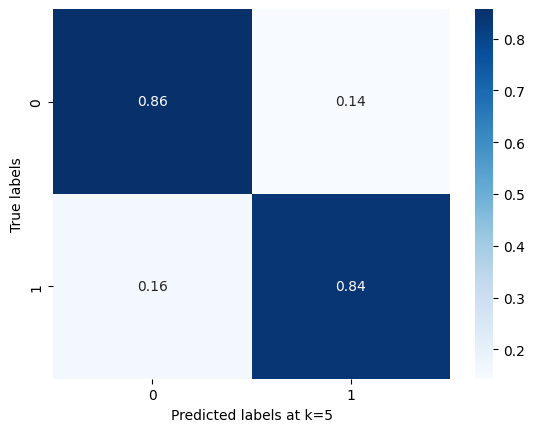

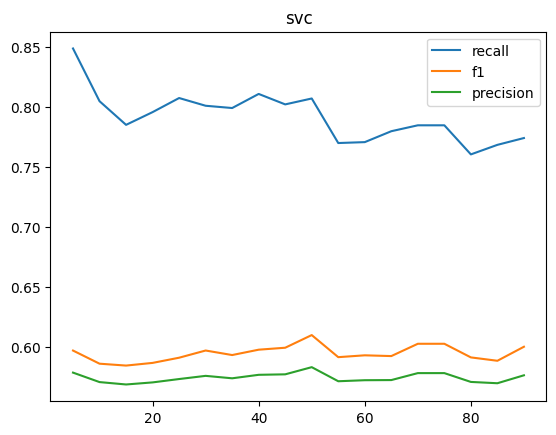

best k =  5
best recall =  0.8488636363636364
best precision =  0.5787828359021416
best f1 =  0.5971672241810566
best aoc =  0.8488636363636364
best best_accuracy =  0.8563049853372434


In [98]:
from sklearn.ensemble import AdaBoostClassifier

getBest_Feature_stratified(LogisticRegression(), "linear regression")
getBest_Feature_stratified(XGBClassifier(), "xg boost")
getBest_Feature_stratified(AdaBoostClassifier(n_estimators=50, learning_rate=1), "ada_boost")
getBest_Feature_stratified(SVC(), "svc")

In [99]:
print(besgt_feature)

NameError: name 'besgt_feature' is not defined

In [100]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [101]:
print(classification_report(y_test,y_pred))

NameError: name 'y_test' is not defined

In [102]:
model.score(X_test,y_test)

NameError: name 'model' is not defined

In [103]:
svc_predict=model.predict(X_test)

NameError: name 'model' is not defined

In [104]:
print(classification_report(y_test, svc_predict))

NameError: name 'y_test' is not defined

In [105]:
print(recall_score(y_test, svc_predict, average='binary'))
print(f1_score(y_test, svc_predict, average='binary'))
print(precision_score(y_test, svc_predict, average='binary'))

NameError: name 'y_test' is not defined